In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Define a function to create a CNN model
def create_model(input_shape, num_layers):
    model = Sequential() # Initialize a Sequential model
    # Add the first Conv2D layer with 32 filters, a 3x3 kernel size, ReLU activation, padding, and input shape
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    # Loop to add additional layers
    for i in range(num_layers - 1):
      # Check if spatial dimensions are large enough for adding more layers
        if model.output_shape[1] >= 2 and model.output_shape[2] >= 2:
        # Add another Conv2D layer with the same configuration
            model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
            # Every 2 Conv2D layers, add a MaxPooling2D layer to reduce spatial dimensions
            if (i + 1) % 2 == 0:
                model.add(MaxPooling2D((2, 2)))

    model.add(Flatten()) # Flatten the output to prepare for the dense layers
    model.add(Dense(64, activation='relu')) # Add a Dense layer with 64 units and ReLU activation
    model.add(Dense(10, activation='softmax')) # Output layer with 10 units (for 10 classes) and softmax activation

    return model

In [ ]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

# Initialize the models
model1 = create_model(x_train.shape[1:], 20)
model2 = create_model(x_train.shape[1:], 56)


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Compile the models with the Adam optimizer, categorical crossentropy loss, and track accuracy
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the first model for a specified number of epochs and validate on test data
history1 = model1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))
# Train the second model for the same number of epochs and validate on test data
history2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 18s 8ms/step - loss: 1.7585 - accuracy: 0.3390 - val_loss: 1.4146 - val_accuracy: 0.4791
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3088 - accuracy: 0.5179 - val_loss: 1.1629 - val_accuracy: 0.5813
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1056 - accuracy: 0.5997 - val_loss: 1.0562 - val_accuracy: 0.6231
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9733 - accuracy: 0.6521 - val_loss: 1.0089 - val_accuracy: 0.6399
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8820 - accuracy: 0.6859 - val_loss: 0.9359 - val_accuracy: 0.6745
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8148 - accuracy: 0.7128 - val_loss: 0.8700 - val_accuracy: 0.6940
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7642 - accuracy: 0.7323 - val_loss: 0.8790 - val_ac

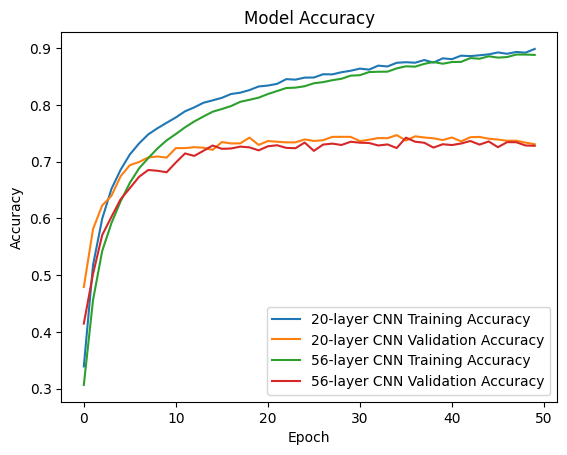

In [ ]:
# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'], label='20-layer CNN Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='20-layer CNN Validation Accuracy')
plt.plot(history2.history['accuracy'], label='56-layer CNN Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='56-layer CNN Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

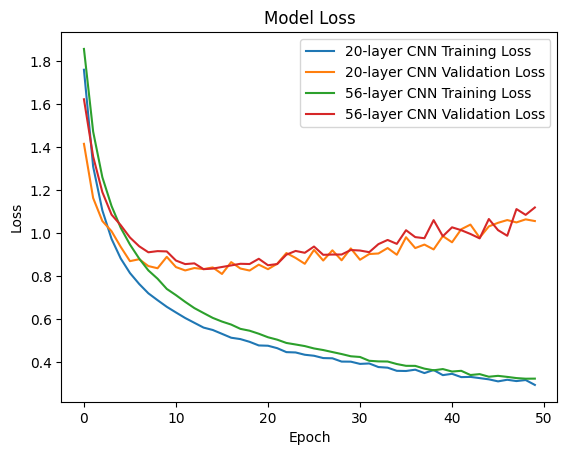

In [ ]:

# Plot the training and validation loss
plt.plot(history1.history['loss'], label='20-layer CNN Training Loss')
plt.plot(history1.history['val_loss'], label='20-layer CNN Validation Loss')
plt.plot(history2.history['loss'], label='56-layer CNN Training Loss')
plt.plot(history2.history['val_loss'], label='56-layer CNN Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

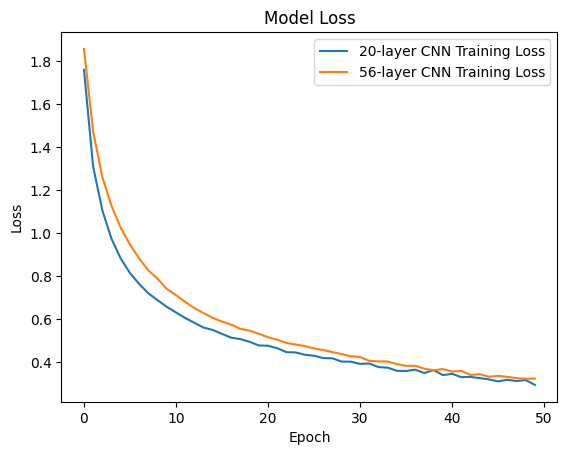

In [ ]:
# Plot the training and validation loss
plt.plot(history1.history['loss'], label='20-layer CNN Training Loss')
plt.plot(history2.history['loss'], label='56-layer CNN Training Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

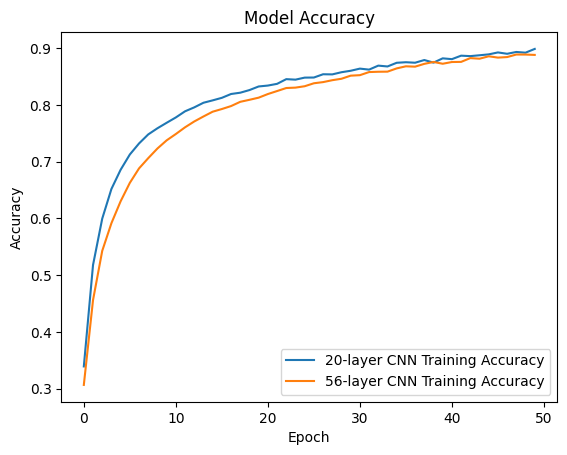

In [ ]:
# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'], label='20-layer CNN Training Accuracy')
plt.plot(history2.history['accuracy'], label='56-layer CNN Training Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()